<a href="https://colab.research.google.com/github/RaeyoungX/RaeyoungX-RaeyoungX.github.io/blob/main/%E2%80%9Cmini_project_1%E2%80%9D%E7%9A%84%E5%89%AF%E6%9C%AC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Task 1.1 -- Dataset 1: Boston Housing dataset
Acquire, preprocess, and analyze the data

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


In [ ]:
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/housing/housing.data"

column_names = ["CRIM", "ZN", "INDUS", "CHAS", "NOX", "RM", "AGE", "DIS", "RAD", "TAX", "PTRATIO", "B", "LSTAT", "MEDV"]

# Load the dataset from the URL
data = pd.read_csv(url, sep='\s+', header=None, names=column_names)

# Drop
data = data.drop(columns=['B'])

print(data.head())


#Replace '?' with the actual placeholder used in your dataset
malformed_rows = data[data.eq('?').any(1)]

print(malformed_rows)

data_cleaned = data.drop(malformed_rows.index)

print(data_cleaned.columns)

      CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  \
0  0.00632  18.0   2.31     0  0.538  6.575  65.2  4.0900    1  296.0   
1  0.02731   0.0   7.07     0  0.469  6.421  78.9  4.9671    2  242.0   
2  0.02729   0.0   7.07     0  0.469  7.185  61.1  4.9671    2  242.0   
3  0.03237   0.0   2.18     0  0.458  6.998  45.8  6.0622    3  222.0   
4  0.06905   0.0   2.18     0  0.458  7.147  54.2  6.0622    3  222.0   

   PTRATIO  LSTAT  MEDV  
0     15.3   4.98  24.0  
1     17.8   9.14  21.6  
2     17.8   4.03  34.7  
3     18.7   2.94  33.4  
4     18.7   5.33  36.2  
Empty DataFrame
Columns: [CRIM, ZN, INDUS, CHAS, NOX, RM, AGE, DIS, RAD, TAX, PTRATIO, LSTAT, MEDV]
Index: []
Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'LSTAT', 'MEDV'],
      dtype='object')


Compute basic statistics on the data to understand it better.

             CRIM          ZN       INDUS        CHAS         NOX          RM  \
count  506.000000  506.000000  506.000000  506.000000  506.000000  506.000000   
mean     3.613524   11.363636   11.136779    0.069170    0.554695    6.284634   
std      8.601545   23.322453    6.860353    0.253994    0.115878    0.702617   
min      0.006320    0.000000    0.460000    0.000000    0.385000    3.561000   
25%      0.082045    0.000000    5.190000    0.000000    0.449000    5.885500   
50%      0.256510    0.000000    9.690000    0.000000    0.538000    6.208500   
75%      3.677083   12.500000   18.100000    0.000000    0.624000    6.623500   
max     88.976200  100.000000   27.740000    1.000000    0.871000    8.780000   

              AGE         DIS         RAD         TAX     PTRATIO       LSTAT  \
count  506.000000  506.000000  506.000000  506.000000  506.000000  506.000000   
mean    68.574901    3.795043    9.549407  408.237154   18.455534   12.653063   
std     28.148861    2.1057

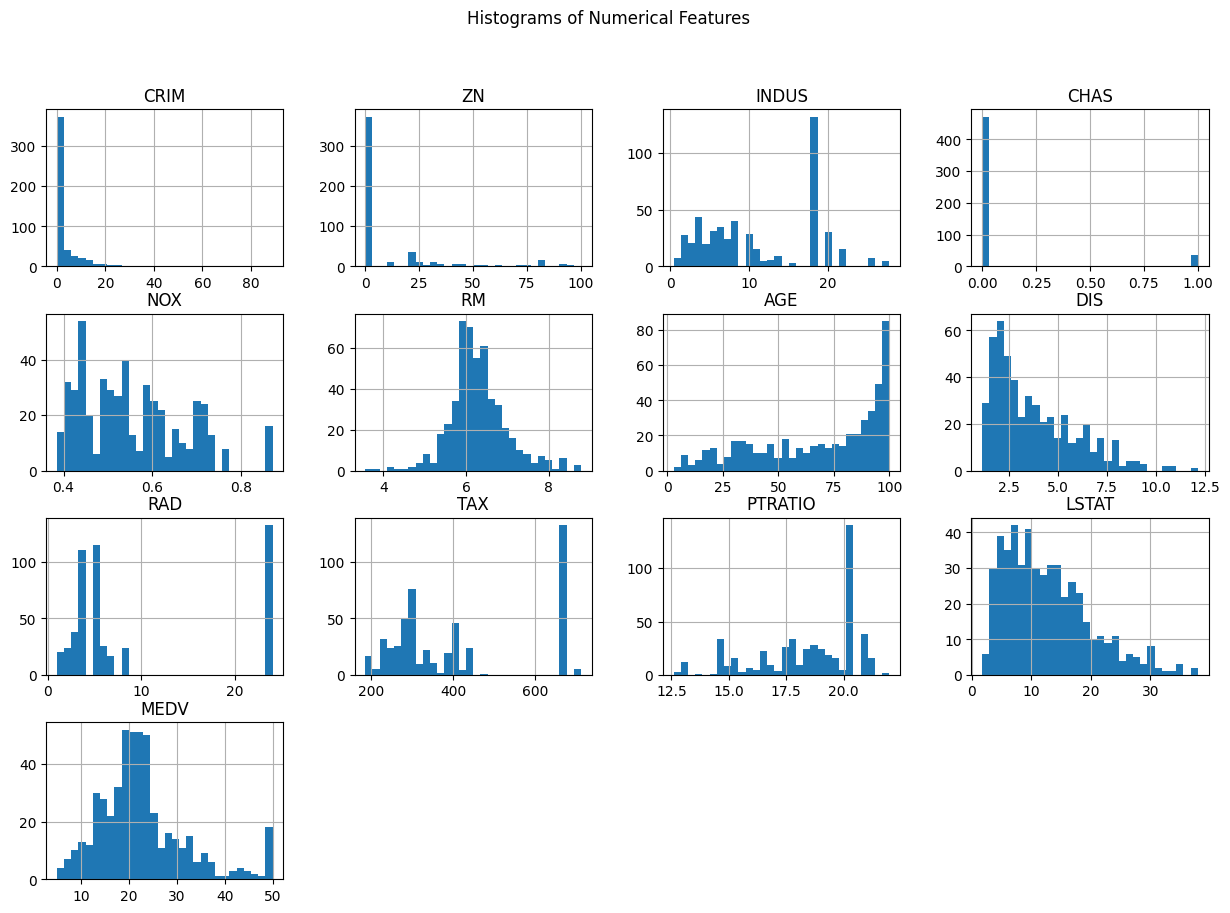

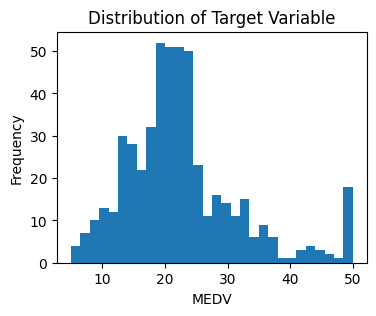

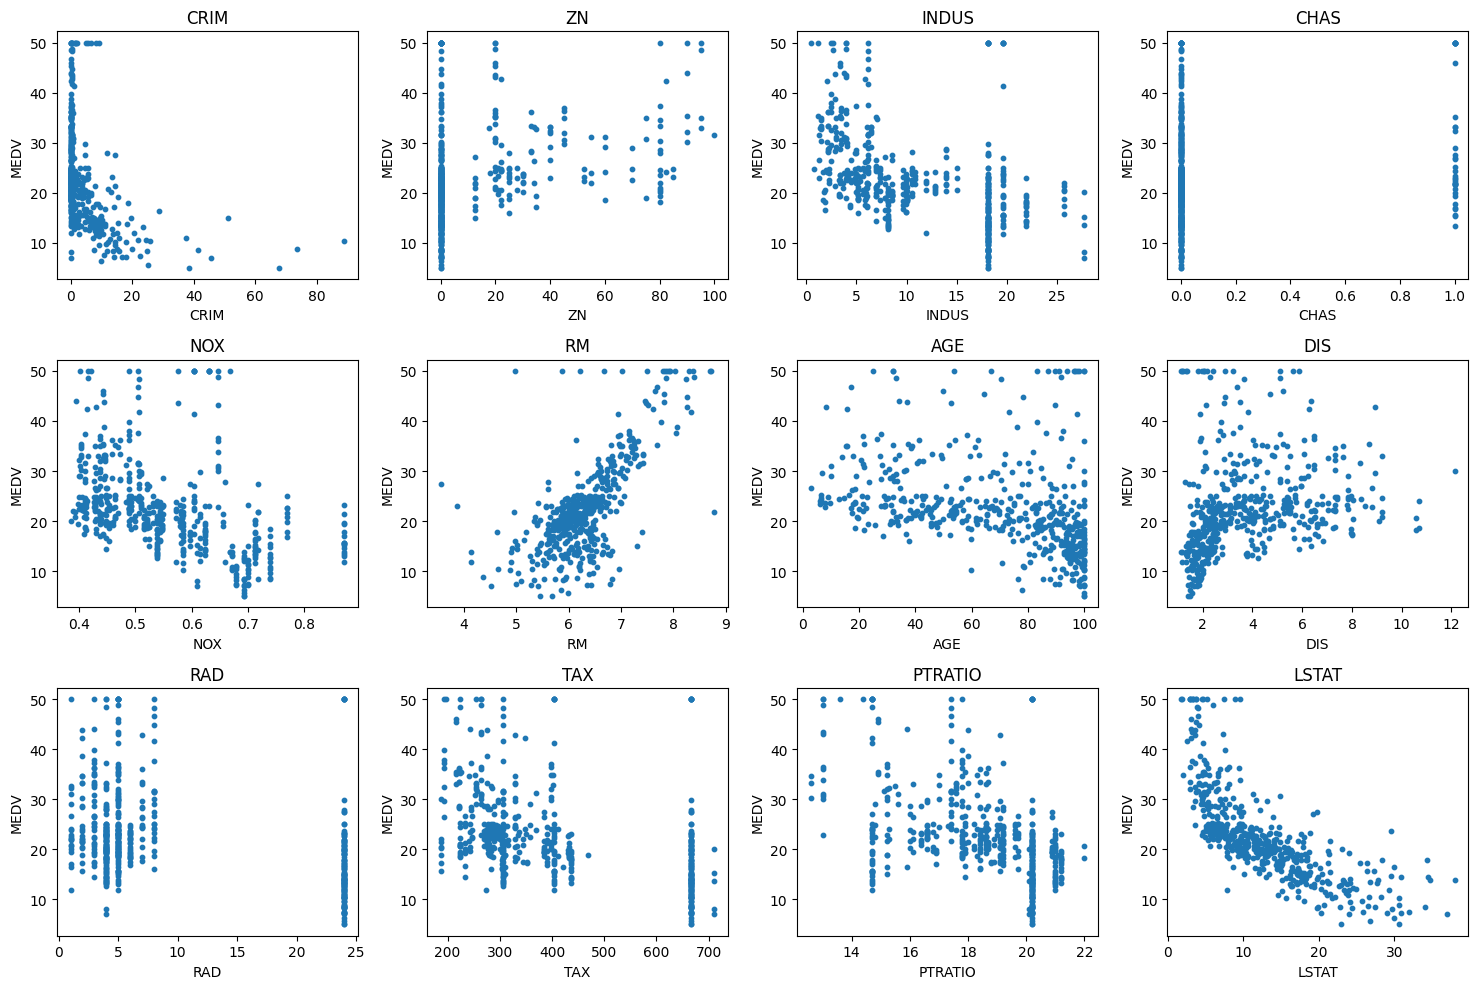

In [ ]:
# Summarize Statistics
summary_stats = data_cleaned.describe()
print(summary_stats)

# Plot Histograms of 13 Numerical Features
data_cleaned.hist(figsize=(15,10), bins=30)
plt.suptitle("Histograms of Numerical Features")
plt.show()

# target = MEDV
# Understand distribution of MEDV
target_column = 'MEDV'
data_cleaned[target_column].plot(kind='hist', bins=30, figsize=(4,3))
plt.title('Distribution of Target Variable')
plt.xlabel(target_column)
plt.ylabel('Frequency')
plt.show()

# Do Scatter plots for features vs target variable

features = data_cleaned.columns.drop('MEDV')  # Exclude the target variable

plt.figure(figsize=(15,10))  # Set the size of the overall figure

# Create subplots
for i, feature in enumerate(features, 1):
    plt.subplot(3, 4, i)  # 3 rows * 4 columns = 12 plots
    plt.scatter(data_cleaned[feature], data_cleaned['MEDV'], s=10)  # ‘s’: size of points
    plt.title(feature)
    plt.xlabel(feature)
    plt.ylabel('MEDV')

plt.tight_layout()
plt.show()


We can see from the histograms: CRIM feature has a long tail to the right (positively skewed), which indicates that while most areas have low crime rates, there are a few areas with very high crime rates.
For the MEDV, it helps us understand the range and central tendency of house prices in the Boston area.
We can see from the scatter plot, RM follows the linear relationship with the target variable "MEDV", indicate that there is a direct correlation between the number of rooms and the median value of the homes.

# Task 2.1 -- Dataset 1: Boston Housing dataset
implement analytical linear regression solution for Dataset 1.

In [ ]:
# Linear Regression

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

# From lecture Notes (Colab)
class LinearRegression:
    def __init__(self, add_bias=True):
        self.add_bias = add_bias

    def fit(self, x, y):
        if x.ndim == 1:
            x = x[:, None]  # add a dimension for the features
        N = x.shape[0]
        if self.add_bias:
            x = np.column_stack([x, np.ones(N)])  # add bias by adding a constant feature of value 1
        self.w = np.linalg.lstsq(x, y, rcond=None)[0]  # return w for the least square difference
        return self

    def predict(self, x):
        if x.ndim == 1:
            x = x[:, None]  # add a dimension for the features
        N = x.shape[0]
        if self.add_bias:
            x = np.column_stack([x, np.ones(N)])  # add bias by adding a constant feature of value 1
        yh = x @ self.w  # predict the y values
        return yh


X = data_cleaned.drop('MEDV', axis=1)  # Features only
y = data_cleaned['MEDV']  # Target column

model = LinearRegression()
model.fit(X.values, y.values)
yh = model.predict(X.values)
#print(yh)

# Task 1.2 -- Dataset 2: Wine dataset
Acquire, preprocess, and analyze the data

1.load the data

In [ ]:
!pip install ucimlrepo

In [ ]:
from ucimlrepo import fetch_ucirepo

# fetch dataset
wine = fetch_ucirepo(id=109)

# data (as pandas dataframes)
X = wine.data.features
y = wine.data.targets

# metadata
print(wine.metadata)

# variable information
#print(wine.variables)

#print(X)
#print(y)

#读取数据
wine_url = 'https://archive.ics.uci.edu/static/public/109/data.csv'
wine_df=pd.read_csv(wine_url)

print(wine_df.shape)
wine_df.head()

{'uci_id': 109, 'name': 'Wine', 'repository_url': 'https://archive.ics.uci.edu/dataset/109/wine', 'data_url': 'https://archive.ics.uci.edu/static/public/109/data.csv', 'abstract': 'Using chemical analysis to determine the origin of wines', 'area': 'Physical Science', 'tasks': ['Classification'], 'characteristics': ['Tabular'], 'num_instances': 178, 'num_features': 13, 'feature_types': ['Integer', 'Real'], 'demographics': [], 'target_col': ['class'], 'index_col': None, 'has_missing_values': 'no', 'missing_values_symbol': None, 'year_of_dataset_creation': 1992, 'last_updated': 'Mon Aug 28 2023', 'dataset_doi': '10.24432/C5PC7J', 'creators': ['Stefan Aeberhard', 'M. Forina'], 'intro_paper': {'title': 'Comparative analysis of statistical pattern recognition methods in high dimensional settings', 'authors': 'S. Aeberhard, D. Coomans, O. Vel', 'published_in': 'Pattern Recognition', 'year': 1994, 'url': 'https://www.semanticscholar.org/paper/83dc3e4030d7b9fbdbb4bde03ce12ab70ca10528', 'doi': '

,Alcohol,Malicacid,Ash,Alcalinity_of_ash,Magnesium,Total_phenols,Flavanoids,Nonflavanoid_phenols,Proanthocyanins,Color_intensity,Hue,0D280_0D315_of_diluted_wines,Proline,class
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065,1
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050,1
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185,1
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480,1
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735,1


-check missing rows

In [ ]:
# Check if there are any missing values represented as '?'
missing_rows = X[X.eq('?').any(axis=1)]

# Print the rows with missing values (optional)
print(missing_rows)

X_cleaned = X.drop(missing_rows.index)
y_cleaned = y.drop(missing_rows.index)

Empty DataFrame
Columns: [Alcohol, Malicacid, Ash, Alcalinity_of_ash, Magnesium, Total_phenols, Flavanoids, Nonflavanoid_phenols, Proanthocyanins, Color_intensity, Hue, 0D280_0D315_of_diluted_wines, Proline]
Index: []


'Empty DataFrame
Columns: [Alcohol, Malicacid, Ash, Alcalinity_of_ash, Magnesium, Total_phenols, Flavanoids, Nonflavanoid_phenols, Proanthocyanins, Color_intensity, Hue, 0D280_0D315_of_diluted_wines, Proline]
Index: []'
indicates there are no missiong rows, so we don't need to drop any rows

2.Compute basic statistics on the data


In [ ]:
#print(X.describe())
print(X_cleaned.shape)
X_cleaned.head()

(178, 13)


,Alcohol,Malicacid,Ash,Alcalinity_of_ash,Magnesium,Total_phenols,Flavanoids,Nonflavanoid_phenols,Proanthocyanins,Color_intensity,Hue,0D280_0D315_of_diluted_wines,Proline
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [ ]:
data = X_cleaned.copy(deep=True)  #append the class to the table
y_copy = y_cleaned.copy(deep=True)
data['Class'] = y_copy
data.head()

,Alcohol,Malicacid,Ash,Alcalinity_of_ash,Magnesium,Total_phenols,Flavanoids,Nonflavanoid_phenols,Proanthocyanins,Color_intensity,Hue,0D280_0D315_of_diluted_wines,Proline,Class
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065,1
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050,1
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185,1
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480,1
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735,1


2    71
1    59
3    48
Name: Class, dtype: int64


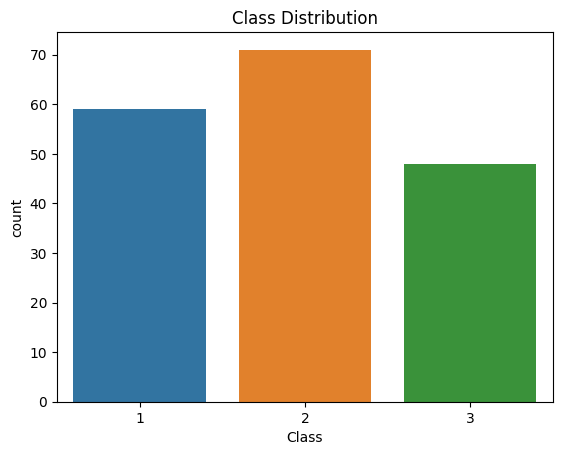

the most common origin of the wine is class 2


In [ ]:
#plot the class distribution of wines
class_distribution = data['Class'].value_counts()
print(class_distribution)
sns.countplot(data=data, x='Class')
plt.title("Class Distribution")
plt.show()
# print the most common class
print("the most common origin of the wine is class " + str(data['Class'].value_counts().idxmax()) )

          Alcohol   Malicacid         Ash  Alcalinity_of_ash   Magnesium  \
count  178.000000  178.000000  178.000000         178.000000  178.000000   
mean    13.000618    2.336348    2.366517          19.494944   99.741573   
std      0.811827    1.117146    0.274344           3.339564   14.282484   
min     11.030000    0.740000    1.360000          10.600000   70.000000   
25%     12.362500    1.602500    2.210000          17.200000   88.000000   
50%     13.050000    1.865000    2.360000          19.500000   98.000000   
75%     13.677500    3.082500    2.557500          21.500000  107.000000   
max     14.830000    5.800000    3.230000          30.000000  162.000000   

       Total_phenols  Flavanoids  Nonflavanoid_phenols  Proanthocyanins  \
count     178.000000  178.000000            178.000000       178.000000   
mean        2.295112    2.029270              0.361854         1.590899   
std         0.625851    0.998859              0.124453         0.572359   
min         0.9

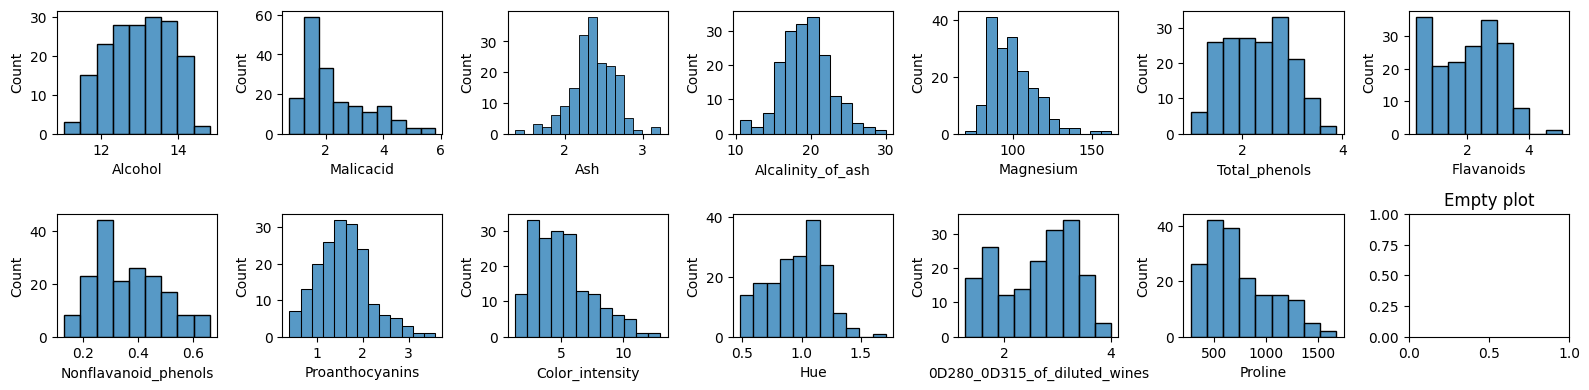

In [ ]:
print(X_cleaned.describe())
rows = 2
cols = 7
#plot the disdribution graph of each features
fig, ax = plt.subplots(nrows=rows, ncols=cols, figsize=(16, 4))

col = X_cleaned.columns #number of features
index = 0

for i in range(rows):
    for j in range(cols):
        # check whether index exceed the length of the col or not
        if index < len(col):
            sns.histplot(X_cleaned[col[index]], ax=ax[i][j])
            index += 1
        else:
            ax[i][j].set_title("Empty plot")  #if exceed the len(col), plot an empty graph
plt.tight_layout()

In [ ]:

# Filter the data to get only rows where the class is 1
class_1_data = wine_df[wine_df['class'] == 1]

# Display the descriptive statistics for class 1 data
print(class_1_data.describe())

# Filter the data to get only rows where the class is 2
class_2_data = wine_df[wine_df['class'] == 2]

# Display the descriptive statistics for class 2 data
print(class_2_data.describe())

# Filter the data to get only rows where the class is 3
class_3_data = wine_df[wine_df['class'] == 3]

# Display the descriptive statistics for class 3 data
print(class_3_data.describe())



         Alcohol  Malicacid        Ash  Alcalinity_of_ash   Magnesium  \
count  59.000000  59.000000  59.000000          59.000000   59.000000   
mean   13.744746   2.010678   2.455593          17.037288  106.338983   
std     0.462125   0.688549   0.227166           2.546322   10.498949   
min    12.850000   1.350000   2.040000          11.200000   89.000000   
25%    13.400000   1.665000   2.295000          16.000000   98.000000   
50%    13.750000   1.770000   2.440000          16.800000  104.000000   
75%    14.100000   1.935000   2.615000          18.700000  114.000000   
max    14.830000   4.040000   3.220000          25.000000  132.000000   

       Total_phenols  Flavanoids  Nonflavanoid_phenols  Proanthocyanins  \
count      59.000000   59.000000             59.000000        59.000000   
mean        2.840169    2.982373              0.290000         1.899322   
std         0.338961    0.397494              0.070049         0.412109   
min         2.200000    2.190000          

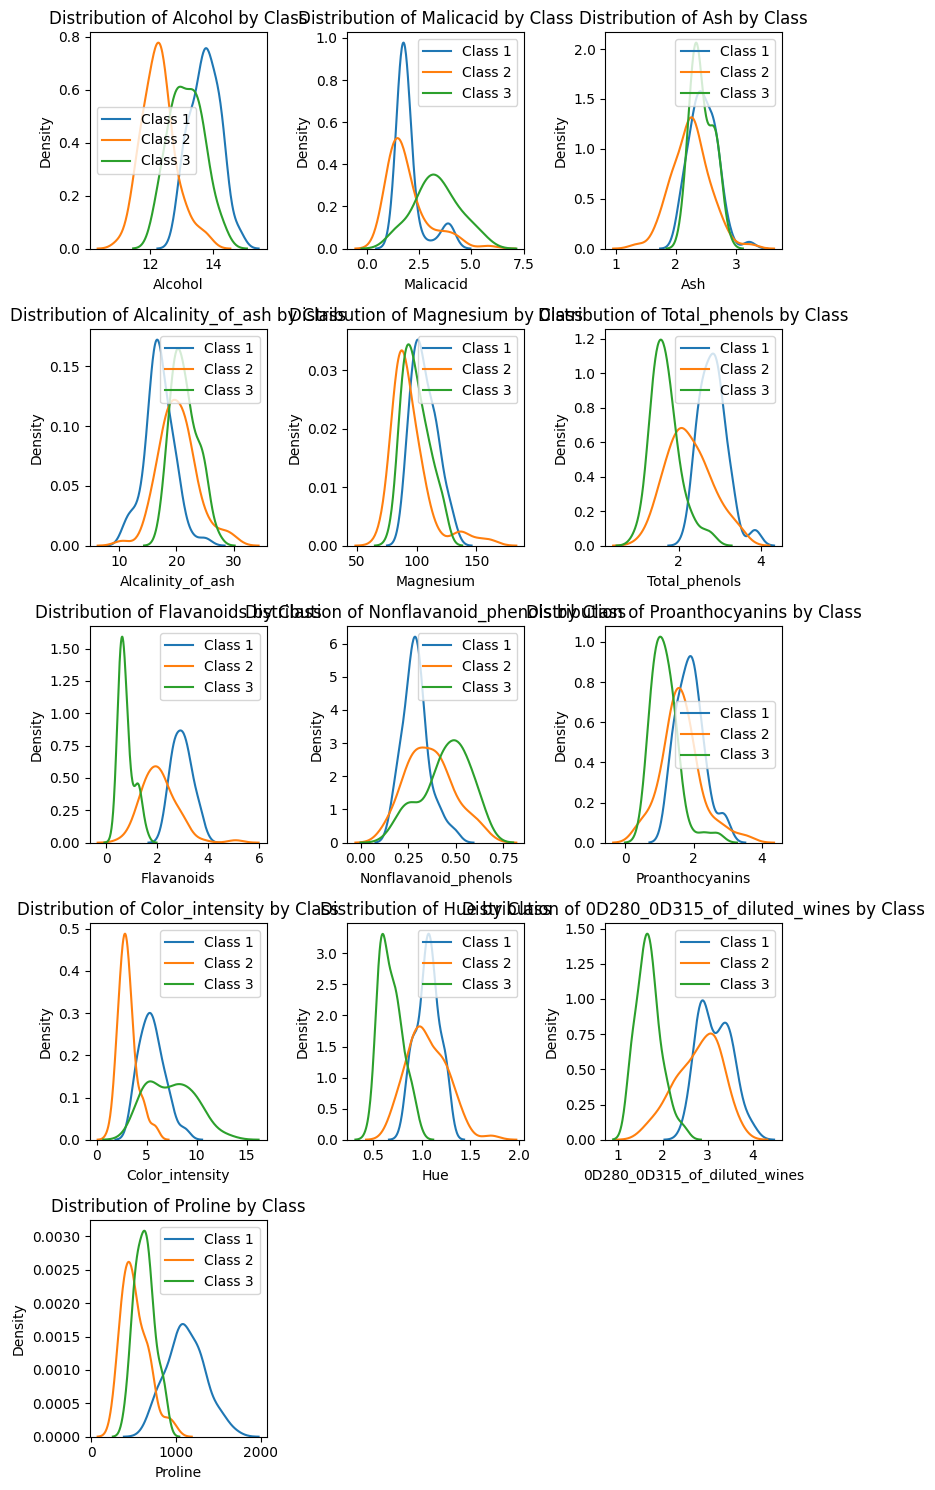

In [ ]:
features = wine_df.columns.drop("class")  # Get the list of features, excluding the class column
n_features = len(features)
n_cols = 3  # Number of columns for the subplots
n_rows = int(np.ceil(n_features / n_cols))  # Calculate the number of rows required based on number of features

plt.figure(figsize=(8, n_rows * 3))

for idx, feature in enumerate(features, 1):
    plt.subplot(n_rows, n_cols, idx)

    # Using kdeplot to plot the feature distribution for each class
    sns.kdeplot(class_1_data[feature], label='Class 1')
    sns.kdeplot(class_2_data[feature], label='Class 2')
    sns.kdeplot(class_3_data[feature], label='Class 3')

    plt.title(f'Distribution of {feature} by Class')
    plt.legend()

plt.tight_layout()
plt.show()


# Task 2.2 -- Implement logistic regression with gradient descent for Dataset 2.


In [ ]:
#the softmax function
def softmax(z):
       numerator = np.exp(z) # in case to avoid the exp became large and unstable: -np.max(z)
       denominator = np.sum(numerator, axis=1, keepdims = True) #+ 1e-10
       return numerator/denominator

def one_hot(y):
       num_classes = len(np.unique(y))
       num_samples = y.shape[0]
       one_hot_encode = np.zeros((num_samples, num_classes))
       one_hot_encode[np.arange(num_samples), y.values.ravel() - 1] = 1 #note the class is 1,2,3 not 0,1,2
       return one_hot_encode

class SoftmaxRegression_GD:
    def __init__(self, add_bias=True, learning_rate=0.001, epsilon=0.001, max_iters=10000, message=True):
        self.add_bias = add_bias
        self.learning_rate = learning_rate
        self.max_iters = max_iters
        self.epsilon = epsilon
        self.message = message

    def gradient(self, X, y):
        N = X.shape[0]
        scores = np.dot(X, self.w)
        y_hat = softmax(scores)
        y_one_hot = one_hot(y)
        grad = np.dot(X.T, y_hat - y_one_hot) / N
        return grad

    def fit(self, X, y):
        if self.add_bias:
            N = X.shape[0]
            X = np.column_stack([X,np.ones(N)])
        N,D = X.shape
        num_classes = len(np.unique(y))
        self.w = np.zeros((D, num_classes))
        g = np.inf
        t = 0
        #gradient descent
        while np.linalg.norm(g) > self.epsilon and t < self.max_iters:
            g = self.gradient(X, y)
            self.w = self.w - self.learning_rate * g
            t += 1

        if self.message:
            print(f"Terminated after {t} iterations with gradient norm = {np.linalg.norm(g)}")
            #print(f"Weights: {self.w}")

    def predict(self, X):
        if self.add_bias:
            N = X.shape[0]
            X = np.column_stack([X, np.ones(N)])
        scores = np.dot(X, self.w)
        return np.argmax(softmax(scores), axis=1) + 1  #remember the class is 1,2,3 not 0,1,2, so we need to add 1

    #def accuracy(self, X, y):
        #y_hat = self.predict(X)
        #return np.mean(y_hat == y.to_numpy().ravel()) #note: y_cleaned is a dataframe so we need to convert it to an one-D array

    def metrics(self, X, y):
        y_hat = self.predict(X)
        y = y.to_numpy().ravel()
        #compute accuracy
        accuracy = np.mean(y_hat == y) #note: y_cleaned is a dataframe so we need to convert it to an one-D array
        uni_label = np.unique(y) #[1, 2, 3]
        num_cls = len(np.unique(y))

        #initialization
        precision = np.zeros(num_cls)
        recall = np.zeros(num_cls)
        f1_score = np.zeros(num_cls)

        for i, label in enumerate(uni_label):
          #true positive
          TP = np.sum((y == label)& (y_hat == label))
          #false positive
          FP = np.sum((y != label)& (y_hat == label))
          #true negative
          TN = np.sum((y != label)& (y_hat != label))
          #false negative
          FN = np.sum((y == label)& (y_hat != label))

          precision[i] = TP / (TP + FP) if TP + FP > 0 else 0
          recall[i] = TP / (TP + FN) if TP + FN > 0 else 0
          f1_score[i] = (2 * precision[i] * recall[i]) / (precision[i] + recall[i]) if precision[i] + recall[i] > 0 else 0

        precision_avg = np.mean(precision)
        recall_avg = np.mean(recall)
        f1_score_avg = np.mean(f1_score)
        #print(f"Accuracy: {accuracy:.4f}\nPrecision: {precision_avg:.4f}\nRecall: {recall_avg:.4f}\nF1-score: {f1_score_avg:.4f}")

        return accuracy, precision_avg, recall_avg, f1_score_avg





 # Task 2.3 -- Implement mini-batch stochastic gradient descent for both linear and logistic regression

In [ ]:

#the softmax function
def softmax(z):
       numerator = np.exp(z) # in case to avoid the exp became large and unstable: -np.max(z)
       denominator = np.sum(numerator, axis=1, keepdims = True) #+ 1e-10
       return numerator/denominator
#one hot conversion
def one_hot(y):
       num_classes = len(np.unique(y))
       num_samples = y.shape[0]
       one_hot_encode = np.zeros((num_samples, num_classes))
       one_hot_encode[np.arange(num_samples), y.ravel() - 1] = 1 #note the class is 1,2,3 not 0,1,2
       return one_hot_encode

class MiniBatchRegression:
      def __init__(self, add_bias=True, learning_rate=0.001, epsilon=0.001, max_iters=10000, mb_size=8, m_type='Linear',message=True):
          self.add_bias = add_bias
          self.learning_rate = learning_rate
          self.max_iters = max_iters
          self.epsilon = epsilon
          self.message = message
          self.m_batch_size = mb_size
          self.model = m_type
          self.cost_history_linear = []
          self.cost_history_softmax = []

      def compute_softmax_loss(self, y, y_hat):
          N = y.shape[0]
          log_likelihood = -np.log(y_hat[range(N), y-1])
          loss = np.sum(log_likelihood) / N
          return loss

      def gradient(self, X, y):
          N = X.shape[0]
          #gradient for softmax regression
          if (self.model == "Linear"):
              y_hat = np.dot(X, self.w)
              grad_l = np.dot(X.T, y_hat - y) / N
              return grad_l
          #gradeint for linear regression
          elif (self.model == "Softmax"):
              scores = np.dot(X, self.w)
              y_hat = softmax(scores)
              y_one_hot = one_hot(y)
              grad_s = np.dot(X.T, y_hat - y_one_hot) / N
              return grad_s

          else:
              print("Error! Please enter the correct type of model") #when self.model is neither softmax nor Linear

      def fit(self, X, y):
          X = np.array(X)
          y = np.array(y)

          if self.add_bias:
              N = X.shape[0]
              X = np.column_stack([X,np.ones(N)])
          N,D = X.shape
          if (self.model == "Softmax"):
              num_classes = len(np.unique(y))
              self.w = np.zeros((D, num_classes)) #weight dimension for softmax regression
          elif(self.model == "Linear"):
              self.w = np.zeros(D) #weight dimension for linear regression
          else:
              raise ValueError("Unsupported model type: {}".format(self.model))#改动

          g = np.inf
          t = 0
          #gradient descent
          while np.linalg.norm(g) > self.epsilon and t < self.max_iters:
              index = np.random.permutation(N)
              X_shuffle = X[index]
              Y_shuffle = y[index]
              for i in range(0, N, self.m_batch_size):
                  X_mini_batch = X_shuffle[i:i+self.m_batch_size]
                  Y_mini_batch = Y_shuffle[i:i+self.m_batch_size]
                  g = self.gradient(X_mini_batch, Y_mini_batch)#the type of the model is being checked in the gradient function
                  self.w = self.w - self.learning_rate * g

              if self.model == "Softmax":
                  scores = np.dot(X, self.w)
                  predictions = softmax(scores)  # 使用softmax得到概率分布
                  loss = self.compute_softmax_loss(y, predictions)
                  self.cost_history_softmax.append(loss)
              elif self.model == "Linear":
                   predictions = X @ self.w
                   mse = ((y - predictions) ** 2).mean()
                   self.cost_history_linear.append(mse)
              t += 1


          if self.message:
              print(f"Terminated after {t} iterations with gradient norm = {np.linalg.norm(g)}")
              print(f"Weights: {self.w}")
          return t

      def predict(self, X):
          N = X.shape[0]
          if (self.model == "Softmax"):
              if self.add_bias:
                  #N = X.shape[0]
                  X = np.column_stack([X, np.ones(N)])
              scores = np.dot(X, self.w)
              return np.argmax(softmax(scores), axis=1) + 1
          elif(self.model == "Linear"):
              if self.add_bias:
                  X = np.column_stack([X, np.ones(N)])  # add bias by adding a constant feature of value 1
              yh = X @ self.w  # predict the y values
              return yh
          else:
              print("Error! Please enter the correct type of model") #when self.model is neither softmax nor Linear

# Task 3.1: perform an 80/20 train/test split and report the performance

**Part 1**: For both datasets, perform an 80/20 train/test split and report the performance metrics on both the training set and test set for each model. Please include metrics such as Mean Squared Error (MSE) for Linear Regression
and accuracy, precision, recall, and F1-score for Logistic Regression.

Dataset1:

MSE for Training Set Data: 22.60428647941742
MSE for Test Set Data: 22.777708563864927


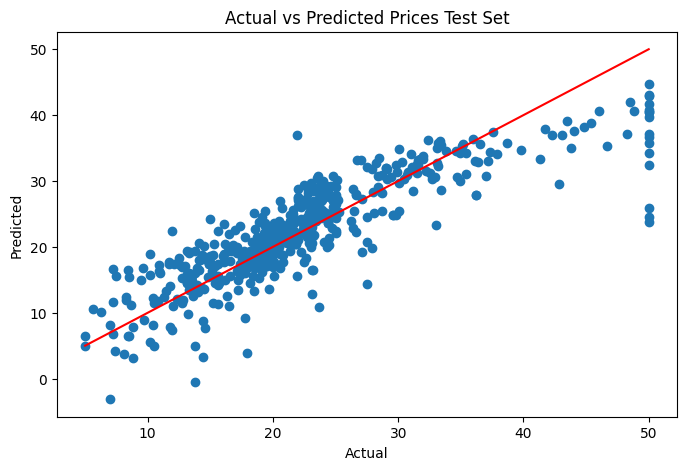

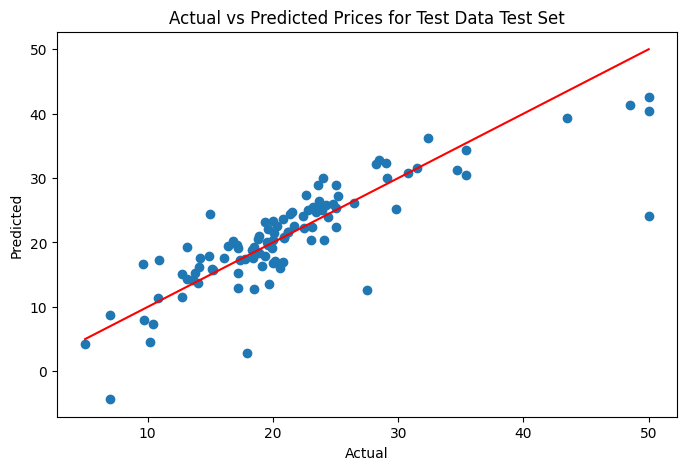

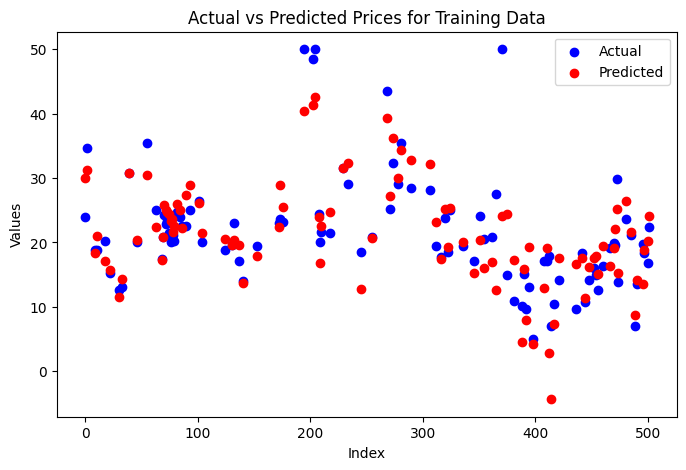

In [ ]:
from sklearn.model_selection import train_test_split

X = data_cleaned.drop('MEDV', axis=1)
y = data_cleaned['MEDV']

# 80/20 train/test split
# random_state=42 to make value unchange, but not sure if I should keep
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train.values, y_train.values)

yh_train = model.predict(X_train.values)
yh_test = model.predict(X_test.values)

# Calculate MSE
mse_train = np.mean((y_train - yh_train) ** 2)
mse_test = np.mean((y_test - yh_test) ** 2)

print(f'MSE for Training Set Data: {mse_train}')
print(f'MSE for Test Set Data: {mse_test}')


# Plot the Actual vs Predicted values before Training
plt.figure(figsize=(8, 5))
plt.scatter(y, yh)
plt.plot([min(y), max(y)], [min(y), max(y)], 'r')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted Prices Test Set')
plt.show()

# Plot the Predicted vs Actual values
plt.figure(figsize=(8, 5))
plt.scatter(y_test, yh_test)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], 'r')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted Prices for Test Data Test Set')
plt.show()

# Different color plot
plt.figure(figsize=(8, 5))
plt.scatter(X_test.index, y_test, color='blue', label='Actual')
plt.scatter(X_test.index, yh_test, color='red', label='Predicted')
plt.title('Actual vs Predicted Prices for Training Data')
plt.xlabel('Index')
plt.ylabel('Values')
plt.legend()
plt.show()

Dataset2:

In [ ]:
from sklearn.preprocessing import StandardScaler
#from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
#from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
#standardized the data
scaler = StandardScaler()
X_sd = scaler.fit_transform(X_cleaned)
print(type(X_sd))

<class 'numpy.ndarray'>


In [ ]:
model = SoftmaxRegression_GD()
X_train, X_test, y_train, y_test = train_test_split(X_sd, y_cleaned, test_size=0.2) #random_state = 42
model.fit(X_train, y_train)  # Use y_train here, not y
y_pred = model.predict(X_test)
print(y_pred)

accuracy, precision, recall, f1_score = model.metrics(X_train, y_train)
print(f"Accuracy: {accuracy:.4f}\nPrecision: {precision:.4f}\nRecall: {recall:.4f}\nF1-score: {f1_score:.4f}")


Terminated after 10000 iterations with gradient norm = 0.07412594917692007
[2 2 2 2 1 2 3 3 1 1 2 2 3 2 1 1 3 2 3 1 1 1 1 3 3 2 2 1 1 2 3 3 3 2 1 2]
Accuracy: 1.0000
Precision: 1.0000
Recall: 1.0000
F1-score: 1.0000


# Task3.2:use a 5-fold cross-validation

**Part 2**: use a 5-fold cross-validation technique and report the performance metrics on both the training set and test set for each model. Again, include appropriate performance metrics for each model.

Dataset1:

MSE for fold 1: 38.5381545683891
MSE for fold 2: 19.682895986157032
MSE for fold 3: 27.117909084339853
MSE for fold 4: 18.605580046896005
MSE for fold 5: 19.693690210968846


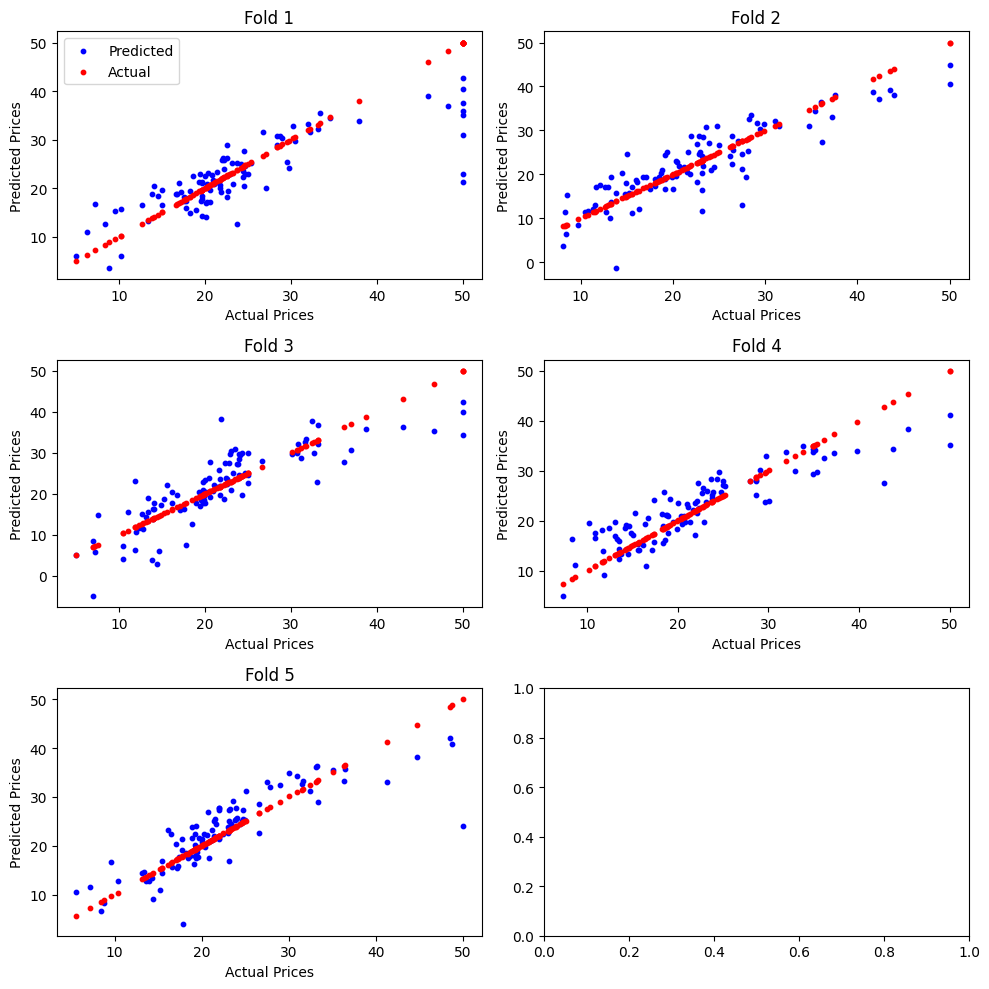

Average MSE over 5 folds: 24.72764597935017


In [ ]:
X = data_cleaned.drop('MEDV', axis=1).values
y = data_cleaned['MEDV'].values  # Target variable

# Set up 5-fold cross-validation
k = 5
fold_size = len(X) // k
indices = np.arange(len(X))
np.random.shuffle(indices)  # Shuffle indices before splitting for randomness

mse_list = []

fig, axs = plt.subplots(3, 2, figsize=(10, 10))  # 3 rows, 2 columns
axs = axs.ravel() # for subplots

for i in range(k):
    test_indices = indices[i * fold_size: (i + 1) * fold_size]
    train_indices = np.concatenate([indices[:i * fold_size], indices[(i + 1) * fold_size:]])

    X_train, X_test = X[train_indices], X[test_indices]
    y_train, y_test = y[train_indices], y[test_indices]

    # Initialize and train the Linear Regression Model
    model = LinearRegression()
    model.fit(X_train, y_train)

    # Predict the target variable for the test set
    y_pred = model.predict(X_test)

    # =Mean Squared Error (MSE) for the current fold
    mse = np.mean((y_test - y_pred) ** 2)
    mse_list.append(mse)

# for subplots
    axs[i].scatter(y_test, y_pred, color='blue', label='Predicted', s=10)
    axs[i].scatter(y_test, y_test, color='red', label='Actual', s=10)
    axs[i].set_title(f'Fold {i + 1}')
    axs[i].set_xlabel('Actual Prices')
    axs[i].set_ylabel('Predicted Prices')
    if i == 0:  # add legend only to the first subplot to avoid clutter
        axs[i].legend(loc='upper left')

    print(f'MSE for fold {i + 1}: {mse_list[i]}')

plt.tight_layout()
plt.show()

average_mse = np.mean(mse_list)  # Calculate the average MSE
print(f'Average MSE over {k} folds: {average_mse}')


Dataset2:

In [ ]:
def score(model,X_train,X_test,y_train,y_test):
  model.fit(X_train, y_train)
  return model.metrics(X_test, y_test)

In [ ]:
from sklearn.model_selection import StratifiedKFold
folds = StratifiedKFold(n_splits=5)
model2 = SoftmaxRegression_GD()
#function: given number of folds, return the accuracy list
def Kfold(num_folds, model):
    accuracy_l = []
    precision_l = []
    recall_l = []
    f1_score_l = []
    for train_index, test_index in num_folds.split(X_sd, y_cleaned):
        X_train, X_test = X_sd[train_index], X_sd[test_index]
        y_train, y_test = y_cleaned.iloc[train_index], y_cleaned.iloc[test_index] #note: here y_cleaned is a dataframe, so we need to use iloc
        #model2 = SoftmaxRegression_GD()
        #print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)
        accuracy, precision, recall, f1_score = score(model, X_train, X_test, y_train, y_test)
        accuracy_l.append(accuracy)
        precision_l.append(precision)
        recall_l.append(recall)
        f1_score_l.append(f1_score)
    accuracy_arr = np.array(accuracy_l)
    precision_arr = np.array(precision_l)
    recall_arr = np.array(recall_l)
    f1_score_arr = np.array(f1_score_l)
    return np.mean(accuracy_arr), np.mean(precision_l), np.mean(recall_l), np.mean(f1_score_l)
#print(Kfold(folds))

In [ ]:
accuracy, precision, recall, f1_score = Kfold(folds, model2)
print("On average, the 5-fold cross validation reports:")
print(f"Accuracy: {accuracy:.4f}\nPrecision: {precision:.4f}\nRecall: {recall:.4f}\nF1-score: {f1_score:.4f}")


Terminated after 10000 iterations with gradient norm = 0.07361829703328873
Terminated after 10000 iterations with gradient norm = 0.07605741885032095
Terminated after 10000 iterations with gradient norm = 0.07718626574115028
Terminated after 10000 iterations with gradient norm = 0.0774445036154689
Terminated after 10000 iterations with gradient norm = 0.07799710483071016
On average, the 5-fold cross validation reports:
Accuracy: 0.9721
Precision: 0.9710
Recall: 0.9765
F1-score: 0.9720


# Task3.3:Sample growing subsets of the training data (20%,30%,...80%)

**Part 3**: For both datasets, Sample growing subsets of the training data (20%,30%,...80%). Observe and explain how does size of training data affects the performance for both models. Plot two curves as a function of training size, one for performance in train and one for test.

Dataset1:

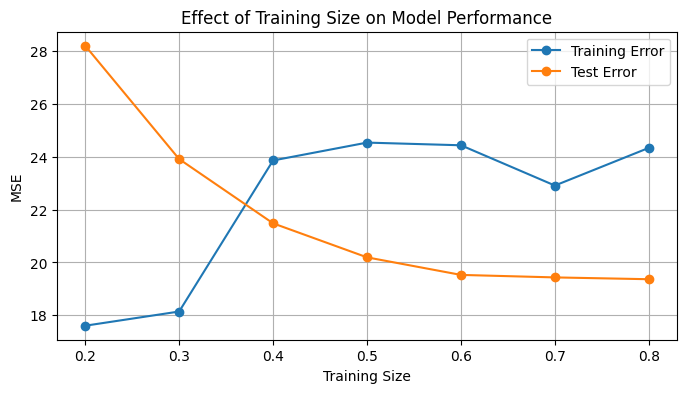

In [ ]:
train_sizes = np.linspace(0.2, 0.8, 7) # 7 sizes in total
train_errors = []
test_errors = []

for size in train_sizes:
    X_train_sub, _, y_train_sub, _ = train_test_split(X_train, y_train, train_size=size, random_state=42)
    model = LinearRegression()
    model.fit(X_train_sub, y_train_sub)

    y_train_pred = model.predict(X_train_sub)
    y_test_pred = model.predict(X_test)

    train_mse = np.mean((y_train_sub - y_train_pred) ** 2)
    test_mse = np.mean((y_test - y_test_pred) ** 2)

    train_errors.append(train_mse)
    test_errors.append(test_mse)

plt.figure(figsize=(8, 4))
plt.plot(train_sizes, train_errors, label='Training Error', marker='o')
plt.plot(train_sizes, test_errors, label='Test Error', marker='o')
plt.xlabel('Training Size')
plt.ylabel('MSE')
plt.title('Effect of Training Size on Model Performance')
plt.legend()
plt.grid(True)
plt.show()


Observation: Training error increase -- As the size of the training dataset increases, each additional data point provides more information (or variance) that the model has to consider. If the data's true relationship is not linear, the linear model will struggle to fit every point perfectly, leading to an increase in training error.

Test Error decreases -- Initially, as more data is added to the training set, the model becomes better at generalizing the underlying pattern of the data, leading to a decrease in the test error.
The model is learning more about the ‘true’ underlying relationship between the independent and dependent variables from the additional data points and is making more accurate predictions on the test set.

Dataset2:

Terminated after 10000 iterations with gradient norm = 0.06719102475809602
Terminated after 10000 iterations with gradient norm = 0.07582828623143902
Terminated after 10000 iterations with gradient norm = 0.07454546945543236
Terminated after 10000 iterations with gradient norm = 0.07516969460744356
Terminated after 10000 iterations with gradient norm = 0.07691752464031831
Terminated after 10000 iterations with gradient norm = 0.07842164211434285
Terminated after 10000 iterations with gradient norm = 0.07780999205226213


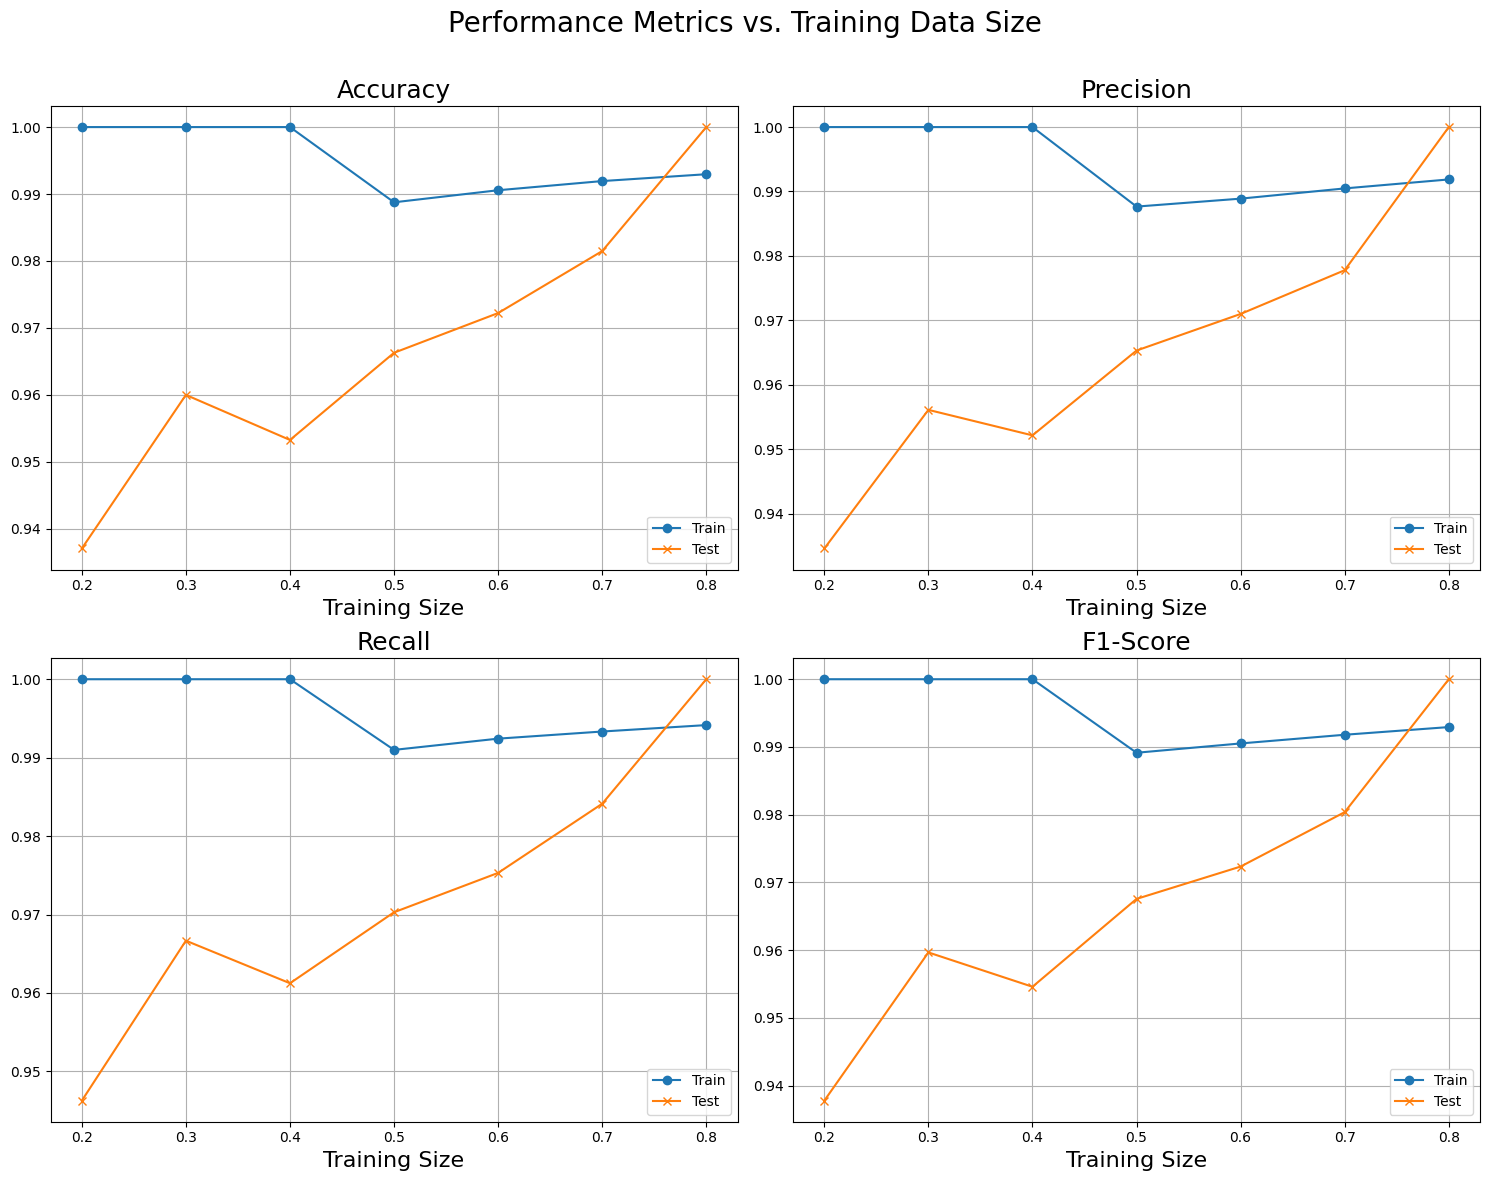

In [ ]:
size_train = [0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8]
size_train_np = np.array(size_train)
size_test = 1 - size_train_np
#print(size_test)
#test_accuracy_list = []
#train_accuracy_list = []
def sample_grow(model):
    train_accuracies = []
    test_accuracies = []
    train_precisions = []
    test_precisions = []
    train_recalls = []
    test_recalls = []
    train_f1s = []
    test_f1s = []
    for size in size_test:
        X_train, X_test, y_train, y_test = train_test_split(X_sd, y_cleaned, test_size=size, random_state = 42)
        #model3 = SoftmaxRegression_GD()
        model.fit(X_train, y_train)  # Use y_train here, not y
        y_pred = model.predict(X_test)
        #print(y_pred)
        train_acc, train_prec, train_rec, train_f1 = model.metrics(X_train, y_train)
        test_acc, test_prec, test_rec, test_f1 = model.metrics(X_test, y_test)
        #print(accu)
        train_accuracies.append(train_acc)
        test_accuracies.append(test_acc)
        train_precisions.append(train_prec)
        test_precisions.append(test_prec)
        train_recalls.append(train_rec)
        test_recalls.append(test_rec)
        train_f1s.append(train_f1)
        test_f1s.append(test_f1)

    return train_accuracies, test_accuracies,train_precisions, test_precisions,train_recalls, test_recalls,train_f1s, test_f1s


model3 = SoftmaxRegression_GD()
train_acc, test_acc, train_pre, test_pre, train_rec, test_rec, train_f, test_f = sample_grow(model3)
fig, axes = plt.subplots(2, 2, figsize=(15, 12))
fig.suptitle('Performance Metrics vs. Training Data Size', fontsize=20)

# Accuracy plot
axes[0, 0].plot(size_train, train_acc, label='Train', marker='o')
axes[0, 0].plot(size_train, test_acc, label='Test', marker='x')
axes[0, 0].set_title('Accuracy', fontsize=18)
axes[0, 0].set_xlabel('Training Size', fontsize=16)
axes[0, 0].grid(True)
axes[0, 0].legend()

# Precision plot
axes[0, 1].plot(size_train, train_pre, label='Train', marker='o')
axes[0, 1].plot(size_train, test_pre, label='Test', marker='x')
axes[0, 1].set_title('Precision', fontsize=18)
axes[0, 1].set_xlabel('Training Size',fontsize=16)
axes[0, 1].grid(True)
axes[0, 1].legend()

# Recall plot
axes[1, 0].plot(size_train, train_rec, label='Train', marker='o')
axes[1, 0].plot(size_train, test_rec, label='Test', marker='x')
axes[1, 0].set_title('Recall',fontsize=18)
axes[1, 0].set_xlabel('Training Size',fontsize=16)
axes[1, 0].grid(True)
axes[1, 0].legend()

# F1-Score plot
axes[1, 1].plot(size_train, train_f, label='Train', marker='o')
axes[1, 1].plot(size_train, test_f, label='Test', marker='x')
axes[1, 1].set_title('F1-Score',fontsize=18)
axes[1, 1].set_xlabel('Training Size',fontsize=16)
axes[1, 1].grid(True)
axes[1, 1].legend()

plt.tight_layout()
plt.subplots_adjust(top=0.9)  # Adjust title spacing
plt.show()


# Task3.4 :Try out growing minibatch sizes, e.g., 8, 16, 32, 64, and 12

**Part 4**: For both datasets, try out growing minibatch sizes, e.g., 8, 16, 32, 64, and 128. Compare the convergence speed and final performance of different batch sizes to the fully batched baseline. Which configuration works the best among the ones you tried?

Dataset1:

In [ ]:
X_data_1 = data_cleaned.drop('MEDV', axis=1)  # Features only
y_data_1 = data_cleaned['MEDV']  # Target column
#print(X_data_1)
#print(y_data_1)
def mean_squared(y, y_pred):
    return np.mean((y - y_pred) ** 2)

def standardize(X):
    mean = np.mean(X, axis=0)
    std = np.std(X, axis=0)
    #add epsilon to avoid the denominator = 0
    epsilon = 1e-10
    X_standardized = (X - mean) / (std + epsilon)
    return X_standardized

X_sd_data1 = standardize(X_data_1)
minibatch_sizes = [8, 16, 32, 64, 128, X_train.shape[0]]
results = []

X_train, X_test, y_train, y_test = train_test_split(X_sd_data1, y_data_1, test_size=0.2, random_state=42)
for mb_size in minibatch_sizes:
    #initialization
    model = MiniBatchRegression(mb_size=mb_size, m_type="Linear", max_iters=10000)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    mse = mean_squared(y_test, y_pred)
    results.append({
        'minibatch_size': mb_size,
        'mse': mse
    })


Terminated after 10000 iterations with gradient norm = 6.843576551001913
Weights: [-1.09277518  0.71880069  0.17380219  0.77035088 -2.10191625  2.97619297
 -0.1039386  -3.07881323  2.08406405 -1.89779162 -1.93700677 -3.83397883
 22.4718753 ]
Terminated after 10000 iterations with gradient norm = 7.780176453833182
Weights: [-1.09475577  0.72945942  0.15906172  0.75030291 -2.11093898  2.95533017
 -0.10926938 -3.07245096  2.08827908 -1.91684377 -1.94136858 -3.82685779
 22.46477509]
Terminated after 10000 iterations with gradient norm = 2.925825707347473
Weights: [-1.09399715  0.71612527  0.17388083  0.77906593 -2.10161463  2.96965116
 -0.1054949  -3.08035428  2.08705119 -1.89461609 -1.93302165 -3.83990225
 22.47195054]
Terminated after 10000 iterations with gradient norm = 4.47791849663003
Weights: [-1.08854977  0.71303938  0.16428855  0.776591   -2.10837979  2.97261591
 -0.10567881 -3.09379457  2.0624149  -1.86989985 -1.93018592 -3.84269801
 22.47144668]
Terminated after 10000 iterations

visualization

[{'minibatch_size': 8, 'mse': 22.774097679081656}, {'minibatch_size': 16, 'mse': 22.708190326730318}, {'minibatch_size': 32, 'mse': 22.772075137252475}, {'minibatch_size': 64, 'mse': 22.79490130732002}, {'minibatch_size': 128, 'mse': 22.903025610564246}, {'minibatch_size': 404, 'mse': 23.929295096717045}]


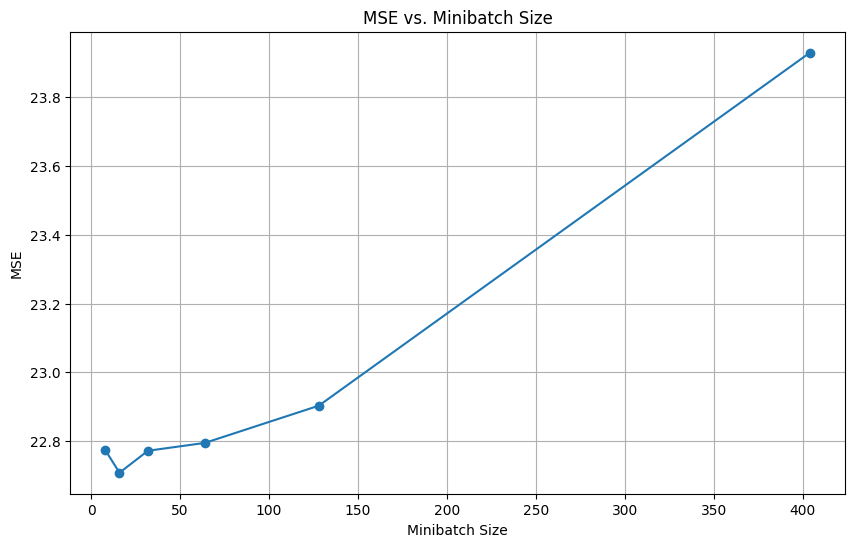

In [ ]:
print(results)
mse_values = [r['mse'] for r in results]

plt.figure(figsize=(10, 6))
plt.plot(minibatch_sizes, mse_values, marker='o')
plt.title('MSE vs. Minibatch Size')
plt.xlabel('Minibatch Size')
plt.ylabel('MSE')
plt.grid(True)
plt.show()

-comparing the loss history with different mini_batch sizes

Terminated after 10000 iterations with gradient norm = 1.9399204051393009
Weights: [-1.09119407  0.72354006  0.17267363  0.76748404 -2.10223055  2.97247391
 -0.10085461 -3.08583034  2.08831292 -1.89866595 -1.94094308 -3.82616139
 22.47295434]
Terminated after 10000 iterations with gradient norm = 4.5390264280200485
Weights: [-1.08285526  0.71765412  0.17690587  0.77464058 -2.10796475  2.98649824
 -0.09486129 -3.06683362  2.07880513 -1.8971777  -1.94340751 -3.83620881
 22.47079579]
Terminated after 10000 iterations with gradient norm = 4.514941382093089
Weights: [-1.09530283  0.71783435  0.17180705  0.78229452 -2.10791279  2.98096517
 -0.10031156 -3.08084075  2.08914029 -1.89500488 -1.93559079 -3.84416081
 22.47929014]
Terminated after 10000 iterations with gradient norm = 4.25988721796223
Weights: [-1.09432325  0.71173117  0.16276355  0.77652656 -2.09991122  2.97440688
 -0.09806976 -3.08936181  2.06523694 -1.86603658 -1.93052686 -3.84547762
 22.47678152]
Terminated after 10000 iteratio

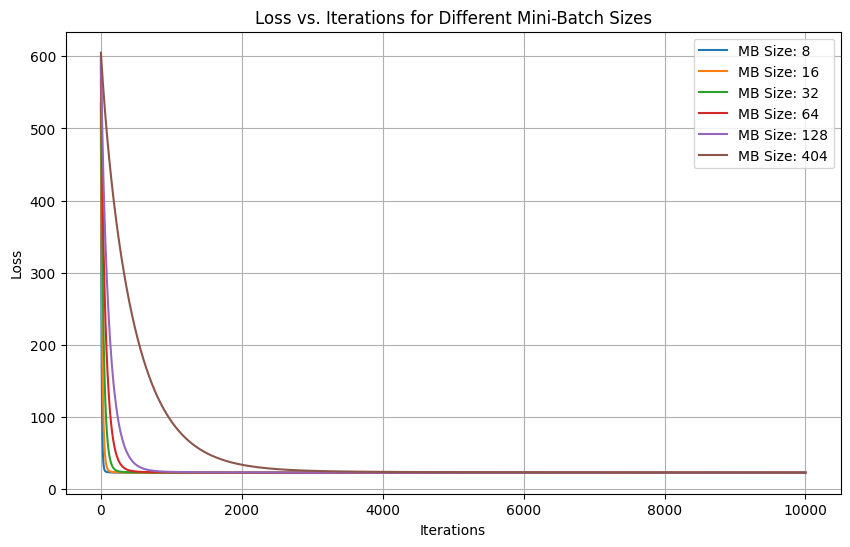

In [ ]:
mini_batch_sizes = [8, 16, 32, 64, 128, X_train.shape[0]]
X_train, X_test, y_train, y_test = train_test_split(X_sd_data1, y_data_1, test_size=0.2, random_state=42)
plt.figure(figsize=(10, 6))

for mb_size in mini_batch_sizes:
    model_data1 = MiniBatchRegression(m_type="Linear", mb_size=mb_size)
    model_data1.fit(X_train, y_train)

    if (model_data1.model == "Softmax"):
        loss_history = model_data1.cost_history_softmax
    elif (model_data1.model == "Linear"):
        loss_history = model_data1.cost_history_linear

    plt.plot(loss_history, label=f"MB Size: {mb_size}")

plt.title('Loss vs. Iterations for Different Mini-Batch Sizes')
plt.xlabel('Iterations')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()



Dataset2:

# Task3.5 present the performance of both linear and logistic regression with at least three different learning rates (your own choice

**Part 5**:   For both datasets, Present the performance of both linear and logistic regression with at least three different
learning rates (your own choice)

Dataset1:

In [ ]:
learning_rates = [0.1, 0.01, 0.001]
results = {}


Dataset2:

Terminated after 10000 iterations with gradient norm = 0.0013760496349744657
Terminated after 10000 iterations with gradient norm = 0.0016730439661317882
Terminated after 10000 iterations with gradient norm = 0.0017442588350182
Terminated after 10000 iterations with gradient norm = 0.001722825706463595
Terminated after 10000 iterations with gradient norm = 0.0018641700631606012
Terminated after 8070 iterations with gradient norm = 0.0009999574346396798
Terminated after 10000 iterations with gradient norm = 0.0011666714737742772
Terminated after 10000 iterations with gradient norm = 0.0012360353321109168
Terminated after 10000 iterations with gradient norm = 0.0014118685324847062
Terminated after 10000 iterations with gradient norm = 0.0015242732085824918
Terminated after 10000 iterations with gradient norm = 0.001508367143226824
Terminated after 10000 iterations with gradient norm = 0.0018534091077266025
[0.951048951048951, 0.968, 0.9719626168224299, 0.9775280898876404, 0.9861111111111

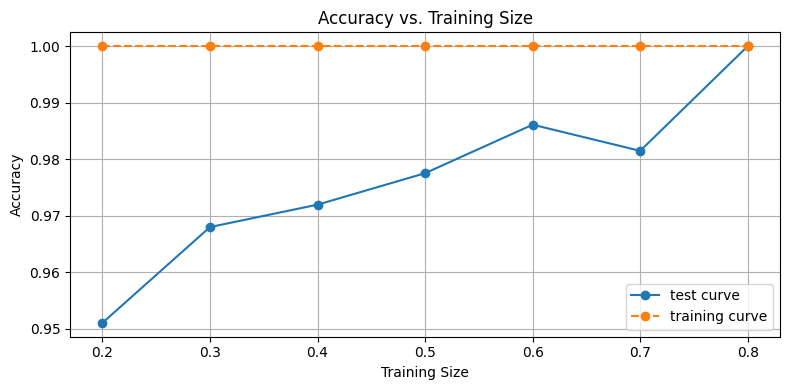

With learning rate 0.1, the graph of the test curve and training curve is shown above
Terminated after 10000 iterations with gradient norm = 0.010876570926188293
Terminated after 10000 iterations with gradient norm = 0.011899710644012004
Terminated after 10000 iterations with gradient norm = 0.012347616226361846
Terminated after 10000 iterations with gradient norm = 0.012235202648632943
Terminated after 10000 iterations with gradient norm = 0.012587927572392441
Terminated after 10000 iterations with gradient norm = 0.007761725512637052
Terminated after 10000 iterations with gradient norm = 0.010674281301880842
Terminated after 10000 iterations with gradient norm = 0.010798946335924247
Terminated after 10000 iterations with gradient norm = 0.011871127139880871
Terminated after 10000 iterations with gradient norm = 0.012447865813448271
Terminated after 10000 iterations with gradient norm = 0.01214516724316308
Terminated after 10000 iterations with gradient norm = 0.012608338485552236
[0.

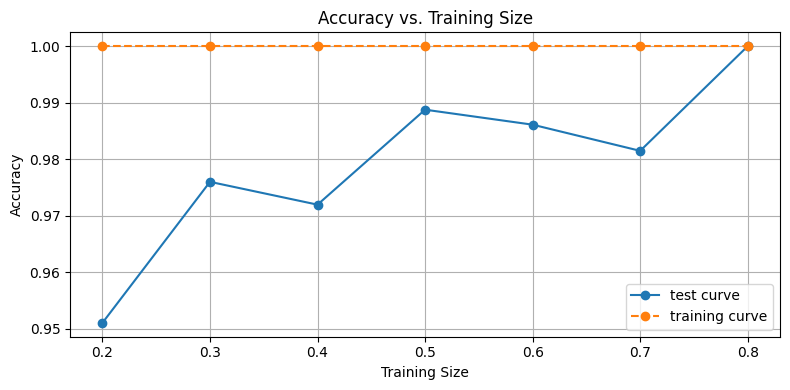

With learning rate 0.01, the graph of the test curve and training curve is shown above
Terminated after 10000 iterations with gradient norm = 0.07361829703328873
Terminated after 10000 iterations with gradient norm = 0.07605741885032095
Terminated after 10000 iterations with gradient norm = 0.07718626574115028
Terminated after 10000 iterations with gradient norm = 0.0774445036154689
Terminated after 10000 iterations with gradient norm = 0.07799710483071016
Terminated after 10000 iterations with gradient norm = 0.06719102475809602
Terminated after 10000 iterations with gradient norm = 0.07582828623143902
Terminated after 10000 iterations with gradient norm = 0.07454546945543236
Terminated after 10000 iterations with gradient norm = 0.07516969460744356
Terminated after 10000 iterations with gradient norm = 0.07691752464031831
Terminated after 10000 iterations with gradient norm = 0.07842164211434285
Terminated after 10000 iterations with gradient norm = 0.07780999205226213
[0.93706293706

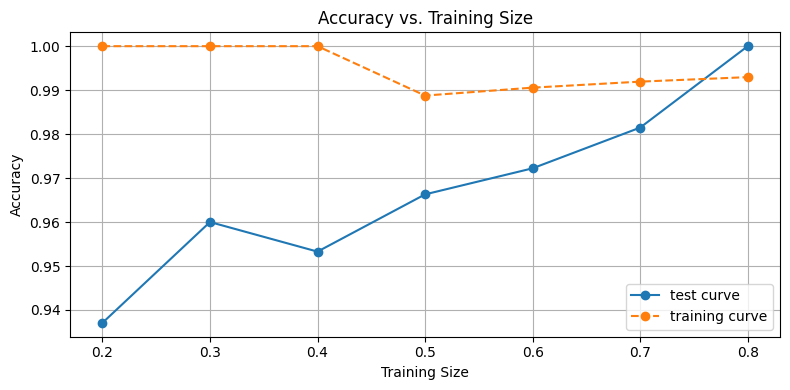

With learning rate 0.001, the graph of the test curve and training curve is shown above


In [ ]:
learning_rates = [0.1, 0.01, 0.001]
fold_5 = StratifiedKFold(n_splits=5)
all_accu = []
for rate in learning_rates:
  model_ = SoftmaxRegression_GD(True, rate, 0.001, 10000, True)
  score_l = Kfold(fold_5, model_)
  #print(score_l)
  all_accu.append(score_l)
  sample_grow(model_)
  #print("On averge, with learning rate " + str(rate) + " ,the accuracy of softmax regression model with GD is " + str(average(score_l)))
  print("With learning rate " + str(rate) + ", the graph of the test curve and training curve is shown above")
  #print(all_accu)


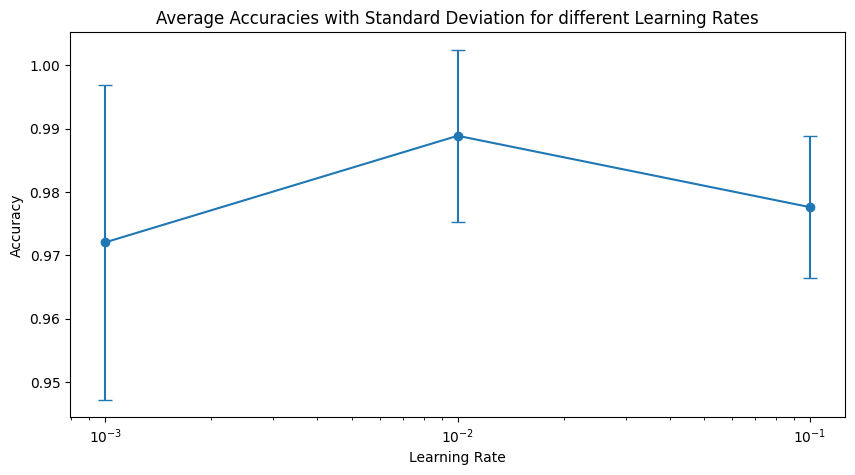

In [ ]:
mean_accu = [np.mean(acc) for acc in all_accu]
std_accu = [np.std(acc) for acc in all_accu]

plt.figure(figsize=(10, 5))
plt.errorbar(learning_rates, mean_accu, yerr=std_accu, fmt='o-', capsize=5)
plt.title('Average Accuracies with Standard Deviation for different Learning Rates')
plt.xlabel('Learning Rate')
plt.ylabel('Accuracy')
plt.xscale('log')
plt.show()

# Task 3.6  Given a variety of parameter configurations, select a performance metric and present the optimal parameter choice for each dataset.

**Part 6**: For both datasets, Given a variety of parameter configurations, select a performance metric and present the optimal parameter choice for each dataset. Please provide a rationale for your metric selection, along with an
explanation of why you opted for that particular metric.

Dataset1:

Dataset2:

# Task3.7

**Part 7**: Only for dataset1, Gaussian Basis Functions

# Task 3.8

**Part 8**: Only for dataset1, Compare analytical linear regression solution with mini-batch stochastic gradient descentbased linear regression solution. What do you find? Why do you think mini-batch stochastic gradient descent is used when an analytical solution is available?

In [ ]:
the_model = MiniBatchRegression(m_type="Softmax")
X_train, X_test, y_train, y_test = train_test_split(X_sd, y_cleaned, test_size=0.2) #random_state = 42
model.fit(X_train, y_train)  # Use y_train here, not y
y_pred = model.predict(X_test)
print(y_pred)

Terminated after 10000 iterations with gradient norm = 0.07463789916843648
[3 1 2 2 3 3 1 2 1 1 2 1 2 2 3 1 2 3 2 3 2 1 1 1 2 3 2 2 2 1 1 2 3 1 3 1]
